In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('train.csv')
df

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [51]:
df.drop(columns=['id'], inplace=True)
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [52]:
df.isna().sum()

age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
diagnosed_diabetes                    0


In [53]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='diagnosed_diabetes', ylabel='count'>

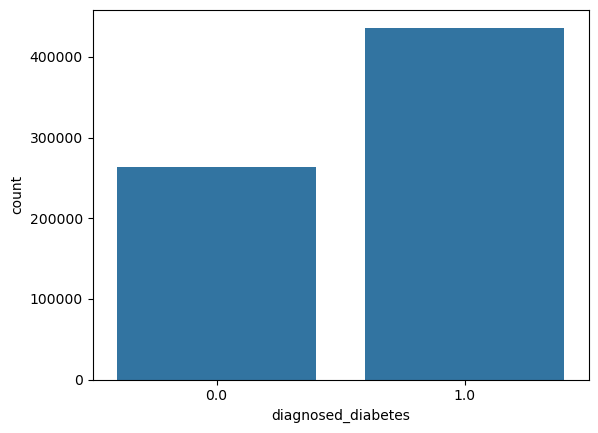

In [54]:
sns.countplot(x='diagnosed_diabetes', data=df)

In [55]:
df.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [56]:
categorical_features = []
numeric_features = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numeric_features.append(column)

In [57]:
numeric_features

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'diagnosed_diabetes']

In [58]:
categorical_features

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status']

<Axes: xlabel='gender', ylabel='count'>

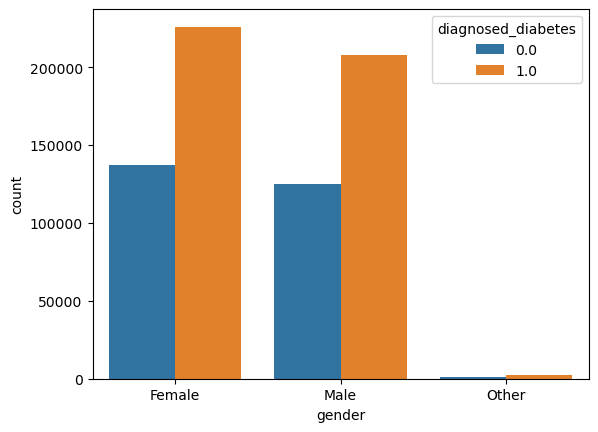

In [59]:
sns.countplot(x='gender', data=df, hue='diagnosed_diabetes')

In [60]:
df['ethnicity'].value_counts()

ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

<Axes: xlabel='ethnicity', ylabel='count'>

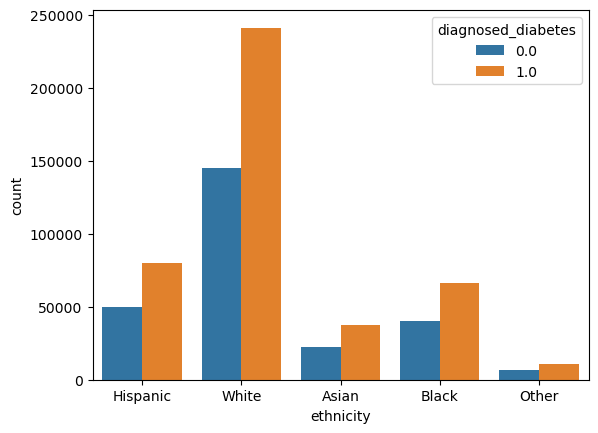

In [61]:
sns.countplot(x='ethnicity', data=df, hue='diagnosed_diabetes')

In [62]:
df['education_level'].value_counts()

education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

<Axes: xlabel='education_level', ylabel='count'>

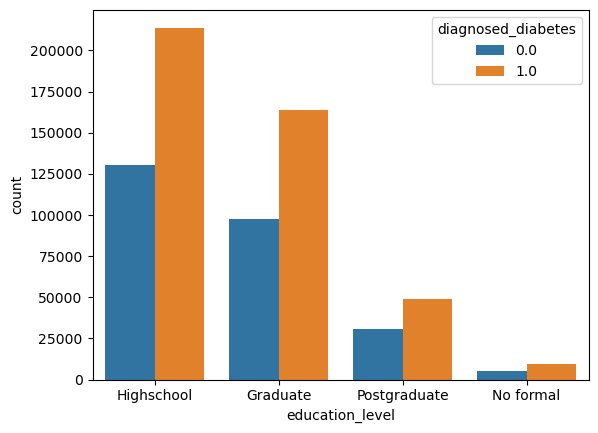

In [63]:
sns.countplot(x='education_level', data=df, hue='diagnosed_diabetes')

In [64]:
df['income_level'].value_counts()

income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

<Axes: xlabel='income_level', ylabel='count'>

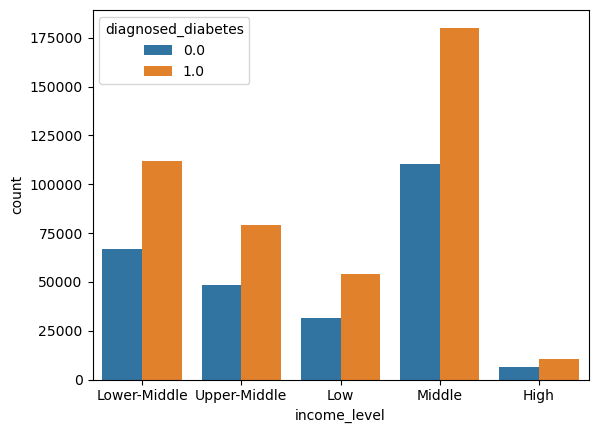

In [65]:
sns.countplot(x='income_level', data=df, hue='diagnosed_diabetes')

In [66]:
df['smoking_status'].value_counts()

smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

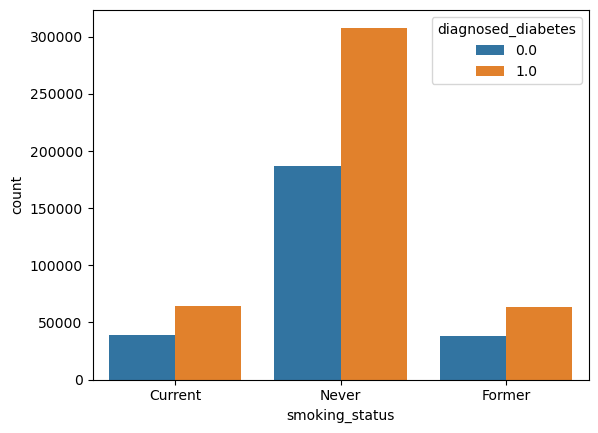

In [67]:
sns.countplot(x='smoking_status', data=df, hue='diagnosed_diabetes')

In [68]:

from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
categorical_cols = categorical_features  # use all categorical features

target_col = 'diagnosed_diabetes'   # change if needed

results = []

for col in categorical_cols:
    temp = df[[col, target_col]].dropna()

    # --- Chi-square test ---
    contingency = pd.crosstab(temp[col], temp[target_col])
    chi2, p_value, _, _ = chi2_contingency(contingency)

    # --- Cramér’s V ---
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

    # --- Mutual Information ---
    le = LabelEncoder()
    X_encoded = le.fit_transform(temp[col])

    mi = mutual_info_classif(
        X_encoded.reshape(-1, 1),
        temp[target_col],
        discrete_features=True
    )[0]

    # --- Decision logic ---
    if p_value < 0.05 and cramers_v >= 0.10:
        decision = "KEEP"
    elif p_value < 0.05 or mi > 0.01:
        decision = "TEST FURTHER"
    else:
        decision = "DROP"

    results.append([
        col,
        round(p_value, 5),
        round(cramers_v, 3),
        round(mi, 3),
        decision
    ])

# --- Final result table ---
result_df = pd.DataFrame(
    results,
    columns=[
        "feature",
        "chi_square_p_value",
        "cramers_v",
        "mutual_information",
        "decision"
    ]
)

result_df


,feature,chi_square_p_value,cramers_v,mutual_information,decision
0,gender,0.01901,0.003,0.0,TEST FURTHER
1,ethnicity,0.00000,0.008,0.0,TEST FURTHER
2,education_level,0.00000,0.008,0.0,TEST FURTHER
3,income_level,0.00000,0.007,0.0,TEST FURTHER
4,smoking_status,0.34496,0.000,0.0,DROP
5,employment_status,0.00043,0.005,0.0,TEST FURTHER


In [69]:
numeric_features

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'diagnosed_diabetes']

In [70]:
df.describe()


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df[numeric_features].corr()[target_col].sort_values(ascending=False)


diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789
Name: diagnosed_diabetes, dtype: float64

<Axes: >

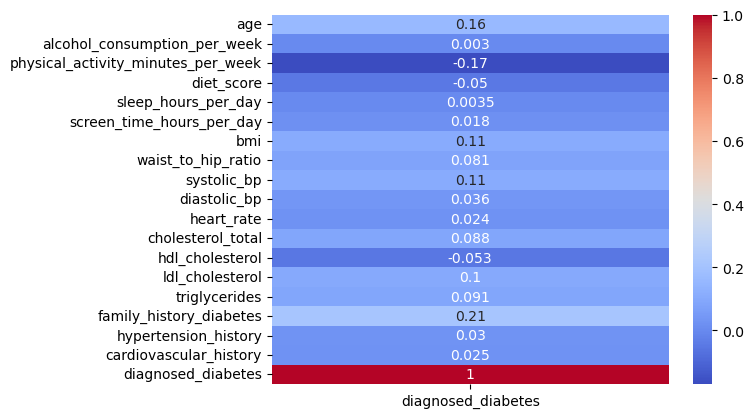

In [72]:
sns.heatmap(df[numeric_features].corr()[target_col].to_frame(), annot=True, cmap='coolwarm')

In [73]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total         

In [75]:
x_train = df.drop(columns=[target_col])
y_train = df[target_col]

In [76]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
numeric_features = [
    col for col in numeric_features 
    if col != 'diagnosed_diabetes'
]


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
# x_test[numeric_features] = scaler.transform(x_test[numeric_features])

In [79]:
from sklearn.linear_model import LogisticRegression

log_base = LogisticRegression(max_iter=1000)
log_base.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [80]:
# y_pred = log_base.predict(x_test)
# y_pred

In [81]:
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, log_base.predict_proba(x_test)[:,1]))
# print(classification_report(y_test, y_pred))


In [82]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(
#     n_estimators=300,
#     random_state=42
# )

# rf.fit(x_train, y_train)


In [83]:
# y_pred = rf.predict(x_test)


In [84]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))
# print(classification_report(y_test, y_pred))

In [85]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(
#     n_estimators=300,
#     max_depth=4,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     eval_metric='auc',
#     random_state=42
# )

# xgb.fit(x_train, y_train)


In [86]:
# y_pred = xgb.predict(x_test)

In [87]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1]))
# print(classification_report(y_test, y_pred))

In [88]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0
)

cat.fit(x_train, y_train)


In [89]:
# y_pred = cat.predict(x_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, cat.predict_proba(x_test)[:,1]))
# print(classification_report(y_test, y_pred))

In [90]:
test_df = pd.read_csv('test.csv')
id = test_df['id']
test_df.drop(columns=['id'], inplace=True)

In [91]:
print(x_train.columns.difference(test_df.columns))
print(test_df.columns.difference(x_train.columns))


Index([], dtype='object')
Index([], dtype='object')


In [94]:
from sklearn.preprocessing import LabelEncoder

# Apply the same preprocessing to test_df as was done to x_train
for col in categorical_features:
    le = LabelEncoder()
    le.fit(x_train[col].astype(str))
    # Handle unknown values by mapping them to a default value
    test_df[col] = test_df[col].astype(str).apply(lambda x: le.transform([x])[0] if x in le.classes_ else 0)

# Scale numeric features
test_df[numeric_features] = scaler.transform(test_df[numeric_features])

test_proba = cat.predict_proba(test_df)[:, 1]
submission_df = pd.DataFrame({
    'id': id,
    'diagnosed_diabetes': test_proba
})

In [96]:
submission_df.to_csv("submission.csv", index=False)
    